# Grabbing Setlists from Spotify AP

to use the spotify web api go to this link for instructions:  https://developer.spotify.com/documentation/web-api
Basically, you would need to grab your 'cid' and 'secret' from the Spotify Web Dev website and from here it allows you
to execute API calls.

My use case in this project is to pull Track URI's from the Sets from my selected DJ's (in spotify playlists)

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cid = ''
secret = ''
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Grabbing Audio features 
After we've made the connection to the Spotify API, we begin to extract the URI which spotify uses to indicate Artists and where the audio features we want is stored. Below I pasted the playlists i wanted to pull from and made a function that grabs the URI's from each playlist. I then use sp.audio.features to grab the Audio features and information from each track.

To indicate track progression between sets i created a new column called 'trackno' that shows progression through out the whole set list. Using this i will able to see how each audio feature progresses through out the set.

In [32]:
## DJ SETS to split, and grabbing track 
nia = 'https://open.spotify.com/playlist/6cJ9kBsDlzUAqHwMraqag6?si=d92a06225b6444a2'
kaytranada = 'https://open.spotify.com/playlist/4A9AFYAR18SZ8CpIs3lBFv?si=0636e8125be94189'
sammyvirji = 'https://open.spotify.com/playlist/4e9hHZADBw9A4qdd8en5ND?si=cc8b89f3bb36414d'
daftpunk = 'https://open.spotify.com/playlist/2mLxEq9wmUuGoTWISPKMbI?si=c576d703c9c045a5'
salutebarry = 'https://open.spotify.com/playlist/3TvjYECdv9QxSWgzWDja6g?si=9d2d4747bb924f92'
me = 'https://open.spotify.com/playlist/6y1bhTWSfitsNZthNUbLpt?si=11bec8576be64cfd'
# grabbing URI's, so that we can obtain track info
def get_track_uri(playlist_url):
    playlist_id = playlist_url.split("/")[-1].split("?")[0]
    track_uris = []
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    for track in tracks:
        track_uris.append(track['track']['uri'])
    return track_uris

niapl = get_track_uri(nia)
kaytranadapl = get_track_uri(kaytranada)
sammyvirjipl =  get_track_uri(sammyvirji)
daftpunkpl =  get_track_uri(daftpunk)
salutebarrypl =  get_track_uri(salutebarry)
mepl = get_track_uri(me)

In [3]:
niaset = pd.DataFrame(sp.audio_features(niapl))
salutebarryset = pd.DataFrame(sp.audio_features(salutebarrypl))
daftpunkset = pd.DataFrame(sp.audio_features(daftpunkpl))
kaytranadaset = pd.DataFrame(sp.audio_features(kaytranadapl))
sammyvirjiset = pd.DataFrame(sp.audio_features(sammyvirjipl))
meset = pd.DataFrame(sp.audio_features(mepl))

In [4]:
salutebarryset['trackno'] = range(1,len(salutebarryset)+1)
daftpunkset['trackno'] = range(1,len(daftpunkset)+1)
niaset['trackno'] = range(1,len(niaset)+1)
sammyvirjiset['trackno'] = range(1,len(sammyvirjiset)+1)
kaytranadaset['trackno'] = range(1,len(kaytranadaset)+1)
meset['trackno'] = range(1,len(meset)+1)


## Audio Features

The columns (audio features) we want for our analysis are :

'danceability', 'energy', 'loudness', 'speechiness', 'acousticness: ', 'instrumentalness', 'liveness', 'valence', 'tempo','key'


__acousticness__: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

__instrumentalness__:Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

__danceability__: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

__energy__ : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

__key__: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

__loudness__: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

__spechiness__: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

__tempo__ : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

__valence__ : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [5]:
salutebarrydf = salutebarryset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo','key']]
daftpunkdf = daftpunkset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo','key']]
kaytranadadf = kaytranadaset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo','key']]
niadf = niaset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo','key']]
sammyvirjidf = sammyvirjiset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo','key']]
medf = meset[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','valence', 'tempo','key']]

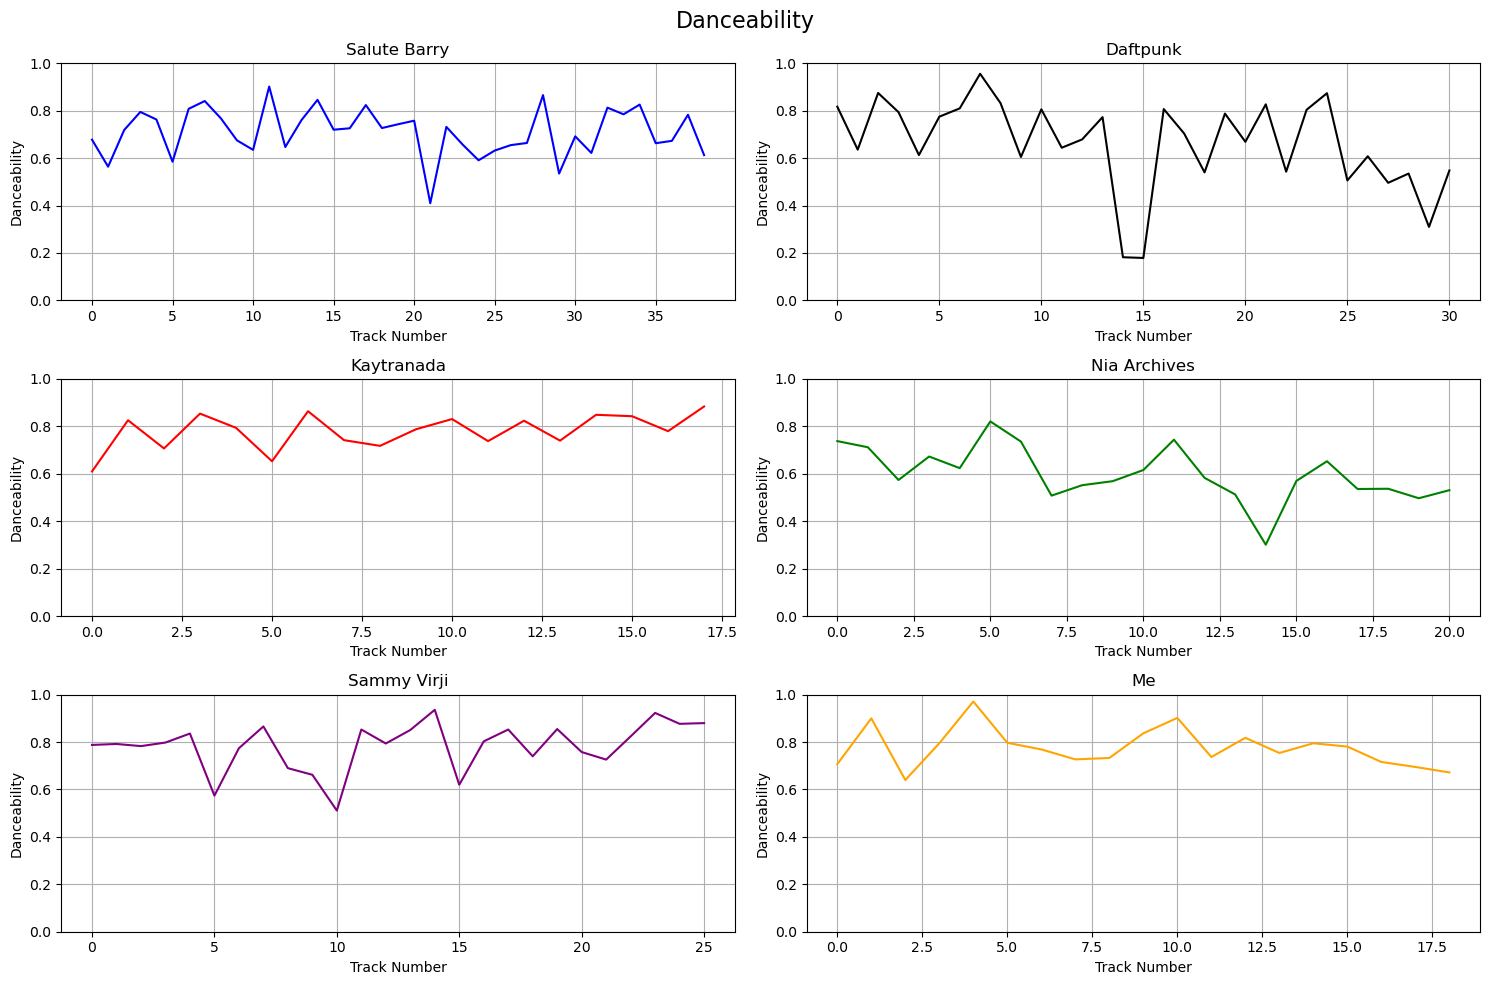

In [6]:
artists_data = [
    ('Salute Barry', salutebarrydf),
    ('Daftpunk', daftpunkdf),
    ('Kaytranada', kaytranadadf),
    ('Nia Archives', niadf),
    ('Sammy Virji', sammyvirjidf),
    ('Me',medf)
]

colors = ['blue', 'black', 'red', 'green', 'purple','orange']

# Define the number of columns for subplots
num_columns = 2

# Calculate the number of rows required to accommodate all artists
num_rows = (len(artists_data) + num_columns - 1) // num_columns

# Plot the danceability for each track as it progresses
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set a common big title for the entire figure
fig.suptitle('Danceability', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['danceability'],color = colors[i])
    ax.set_title(artist, fontsize=12)  # Set the artist name as the subplot title
    ax.set_xlabel('Track Number')
    ax.set_ylabel('Danceability')
    ax.grid(True)
    ax.set_ylim(0, 1)

plt.tight_layout()


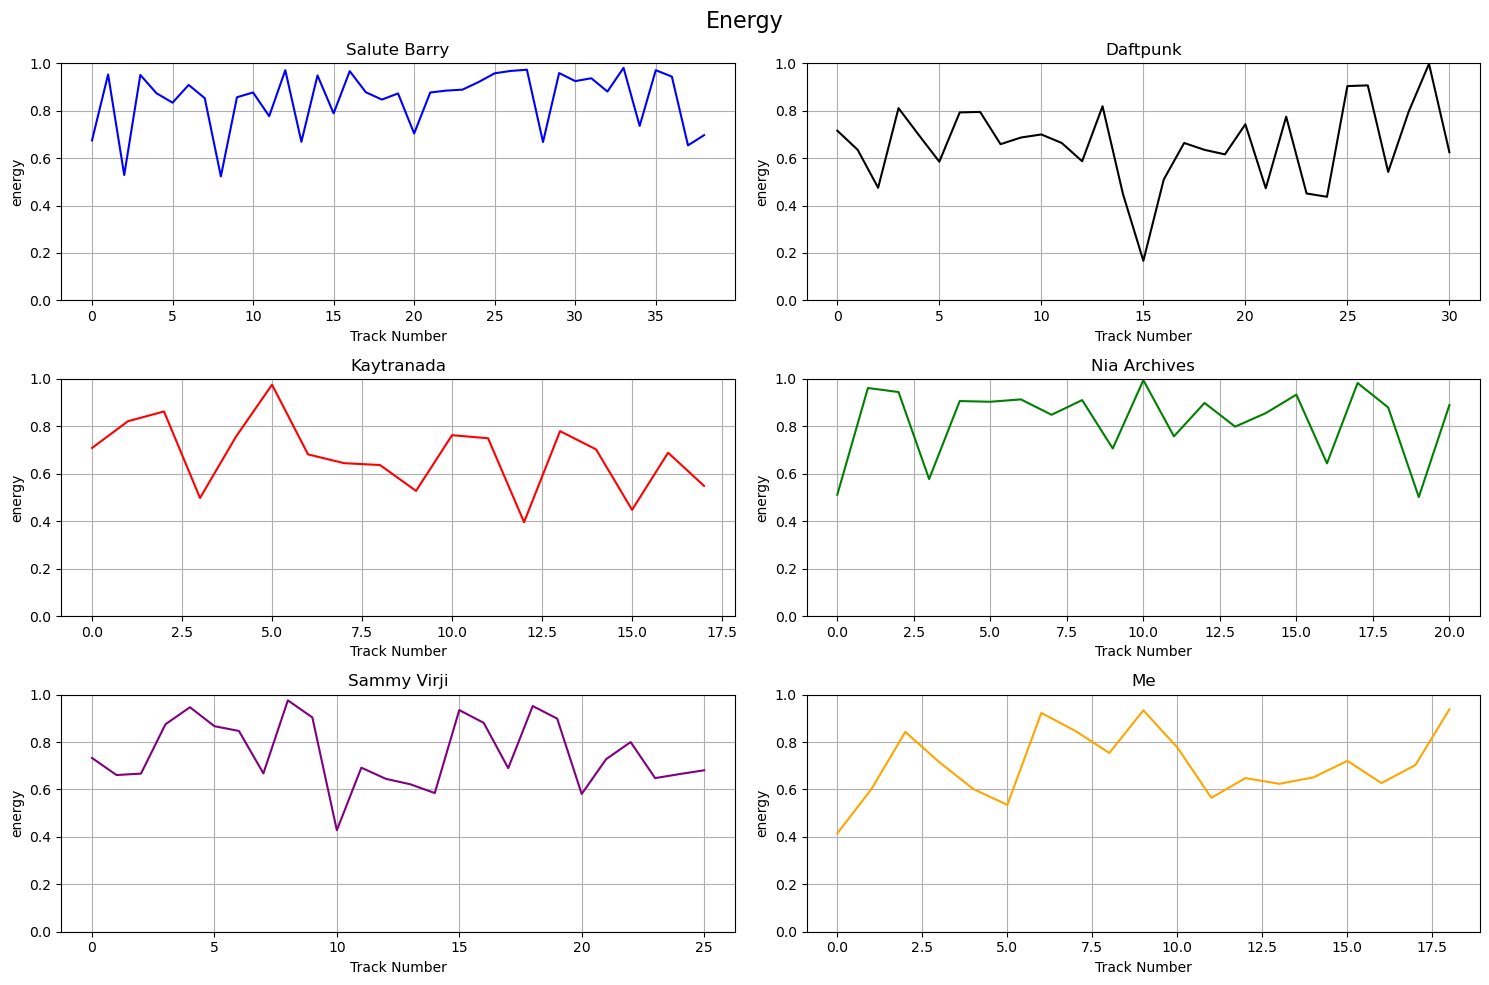

In [7]:
colors = ['blue', 'black', 'red', 'green', 'purple','orange']

num_columns = 2

num_rows = (len(artists_data) + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))

axes = axes.flatten()

fig.suptitle('Energy', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['energy'],color = colors[i])
    ax.set_title(artist, fontsize=12)  # Set the artist name as the subplot title
    ax.set_xlabel('Track Number')
    ax.set_ylabel('energy')
    ax.grid(True)
    ax.set_ylim(0, 1)

plt.tight_layout()


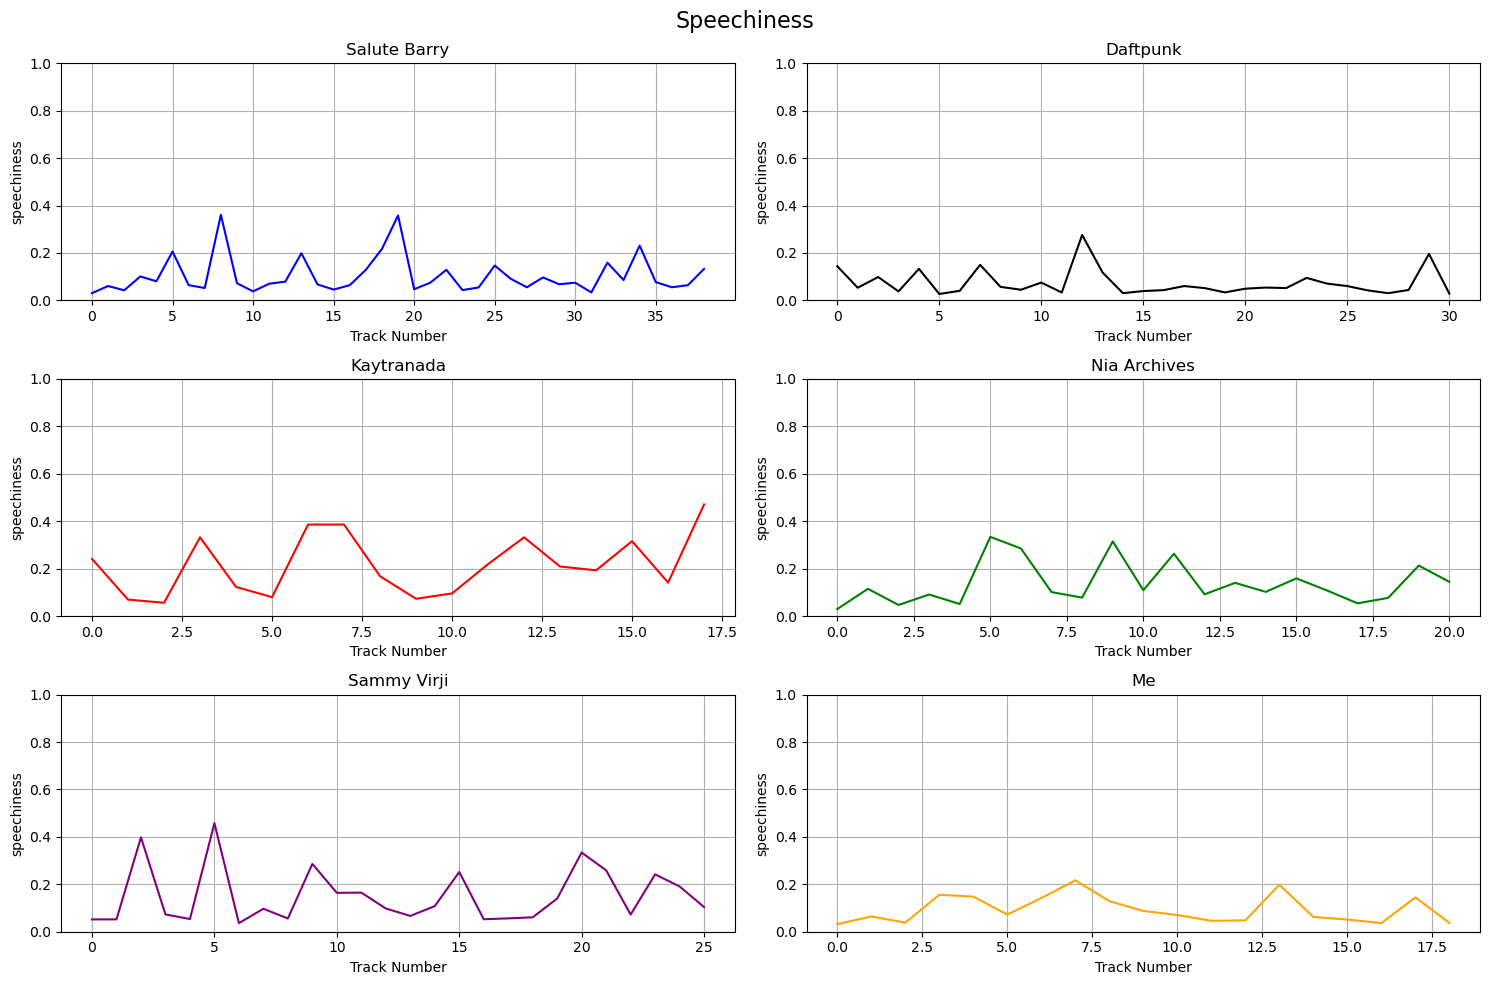

In [8]:
colors = ['blue', 'black', 'red', 'green', 'purple','orange']

num_columns = 2

num_rows = (len(artists_data) + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))

axes = axes.flatten()


fig.suptitle('Speechiness', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['speechiness'],color = colors[i])
    ax.set_title(artist, fontsize=12) 
    ax.set_xlabel('Track Number')
    ax.set_ylabel('speechiness')
    ax.grid(True)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()



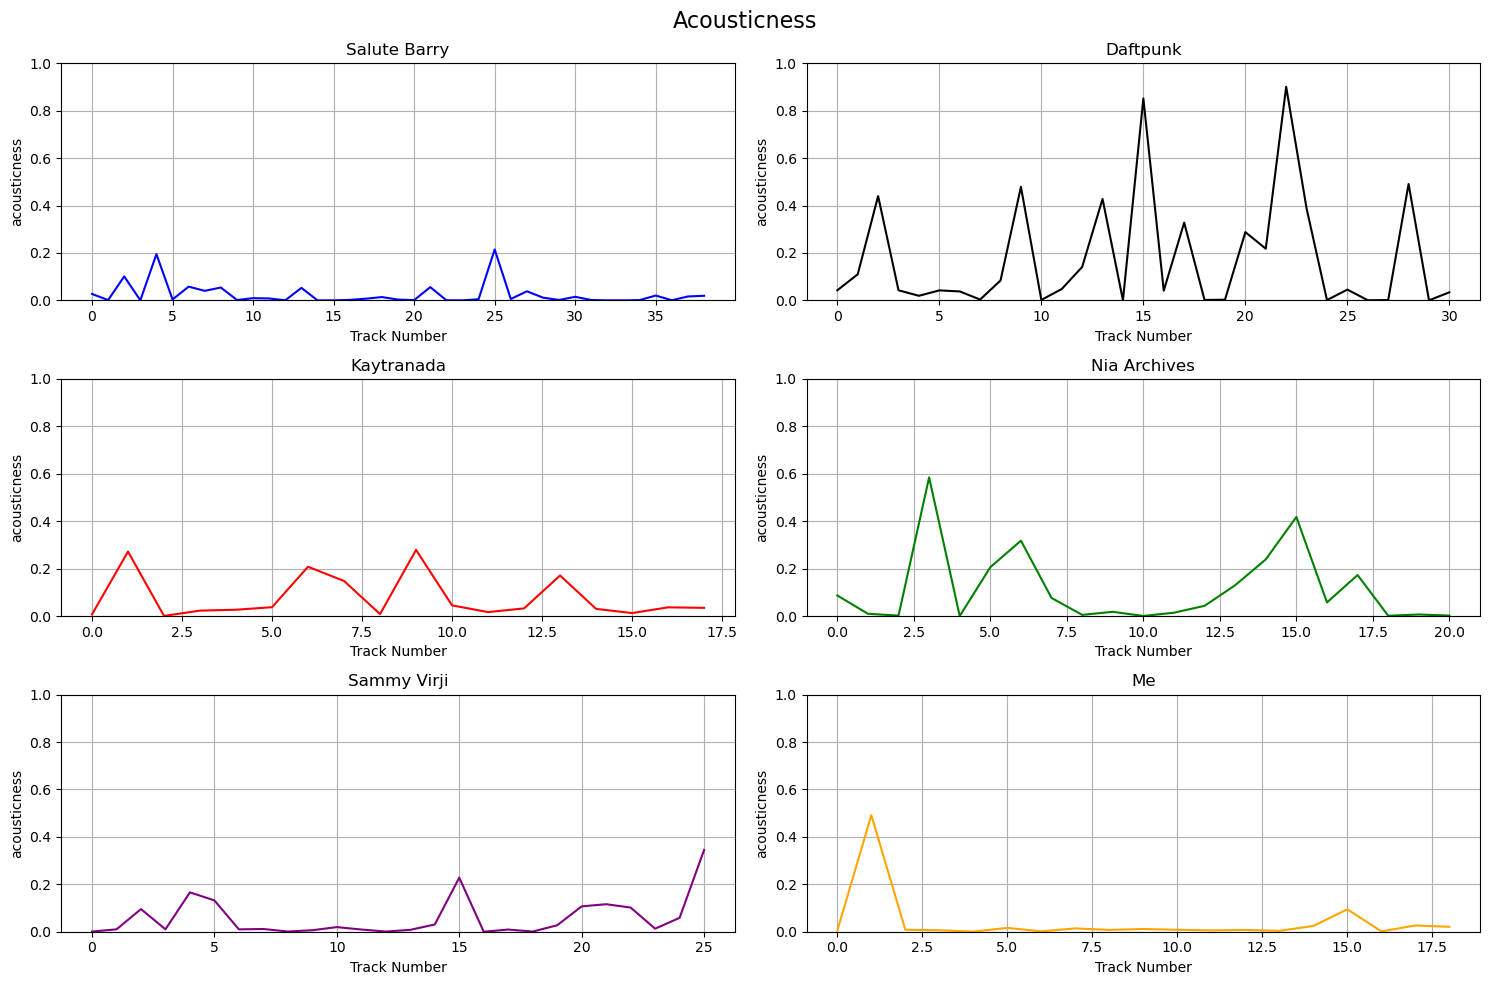

In [9]:
colors = ['blue', 'black', 'red', 'green', 'purple','orange']

# Define the number of columns for subplots
num_columns = 2


num_rows = (len(artists_data) + num_columns - 1) // num_columns


fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))


axes = axes.flatten()


fig.suptitle('Acousticness', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['acousticness'],color = colors[i])
    ax.set_title(artist, fontsize=12)  
    ax.set_xlabel('Track Number')
    ax.set_ylabel('acousticness')
    ax.grid(True)
    ax.set_ylim(0, 1)

plt.tight_layout()



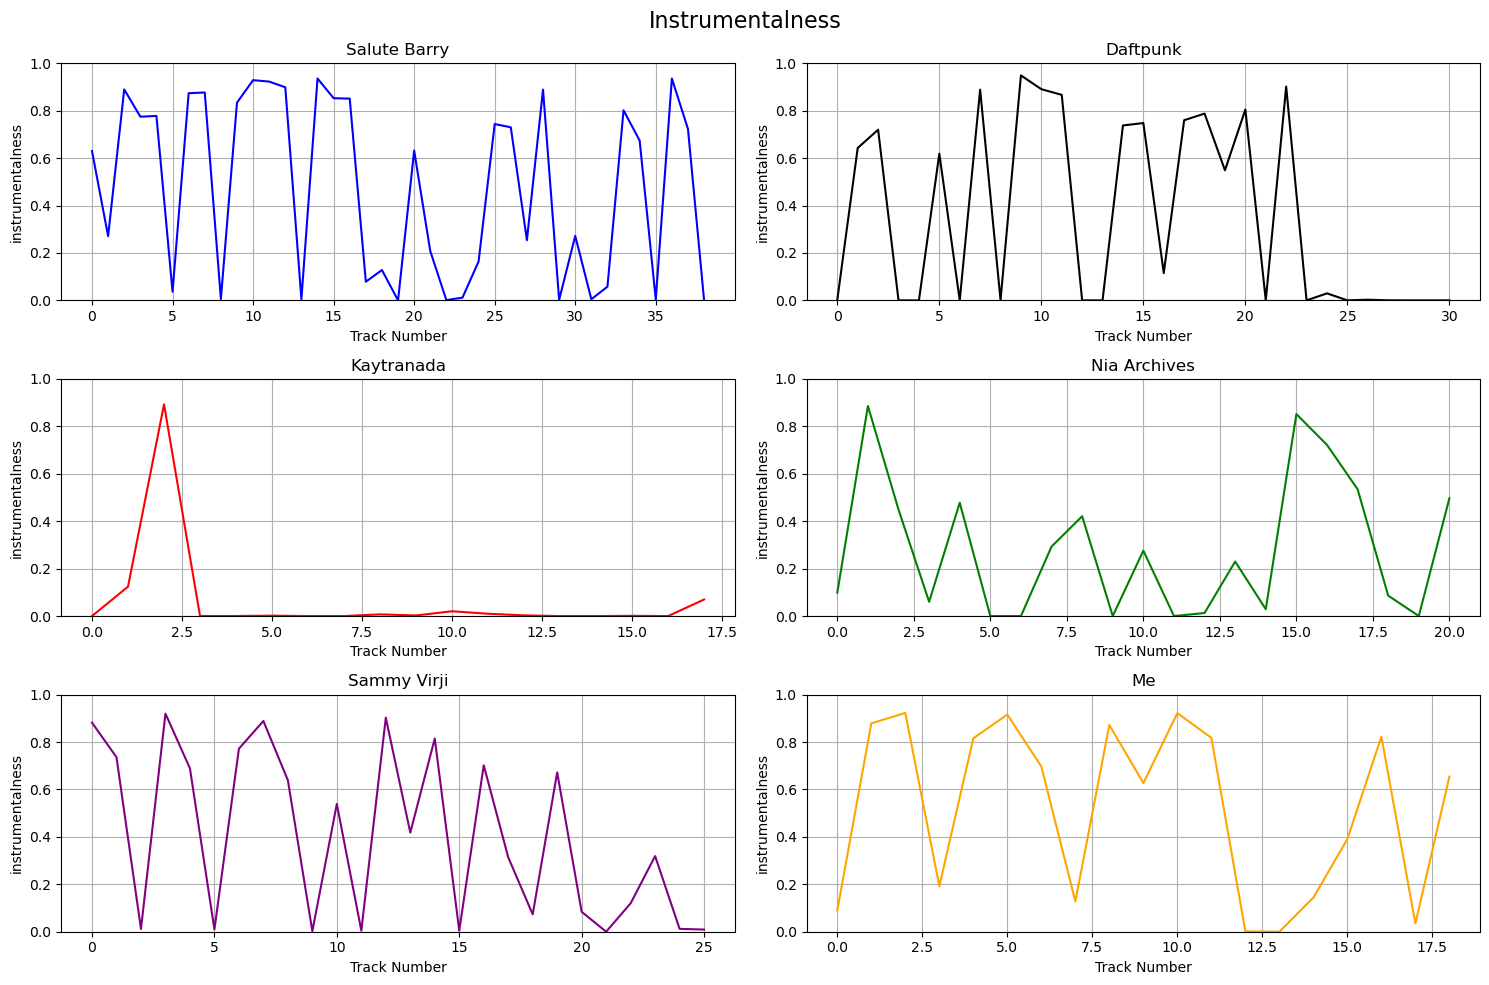

In [10]:
colors = ['blue', 'black', 'red', 'green', 'purple','orange']


num_columns = 2


num_rows = (len(artists_data) + num_columns - 1) // num_columns


fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()


fig.suptitle('Instrumentalness', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['instrumentalness'],color = colors[i])
    ax.set_title(artist, fontsize=12)  # Set the artist name as the subplot title
    ax.set_xlabel('Track Number')
    ax.set_ylabel('instrumentalness')
    ax.grid(True)
    ax.set_ylim(0, 1)

plt.tight_layout()

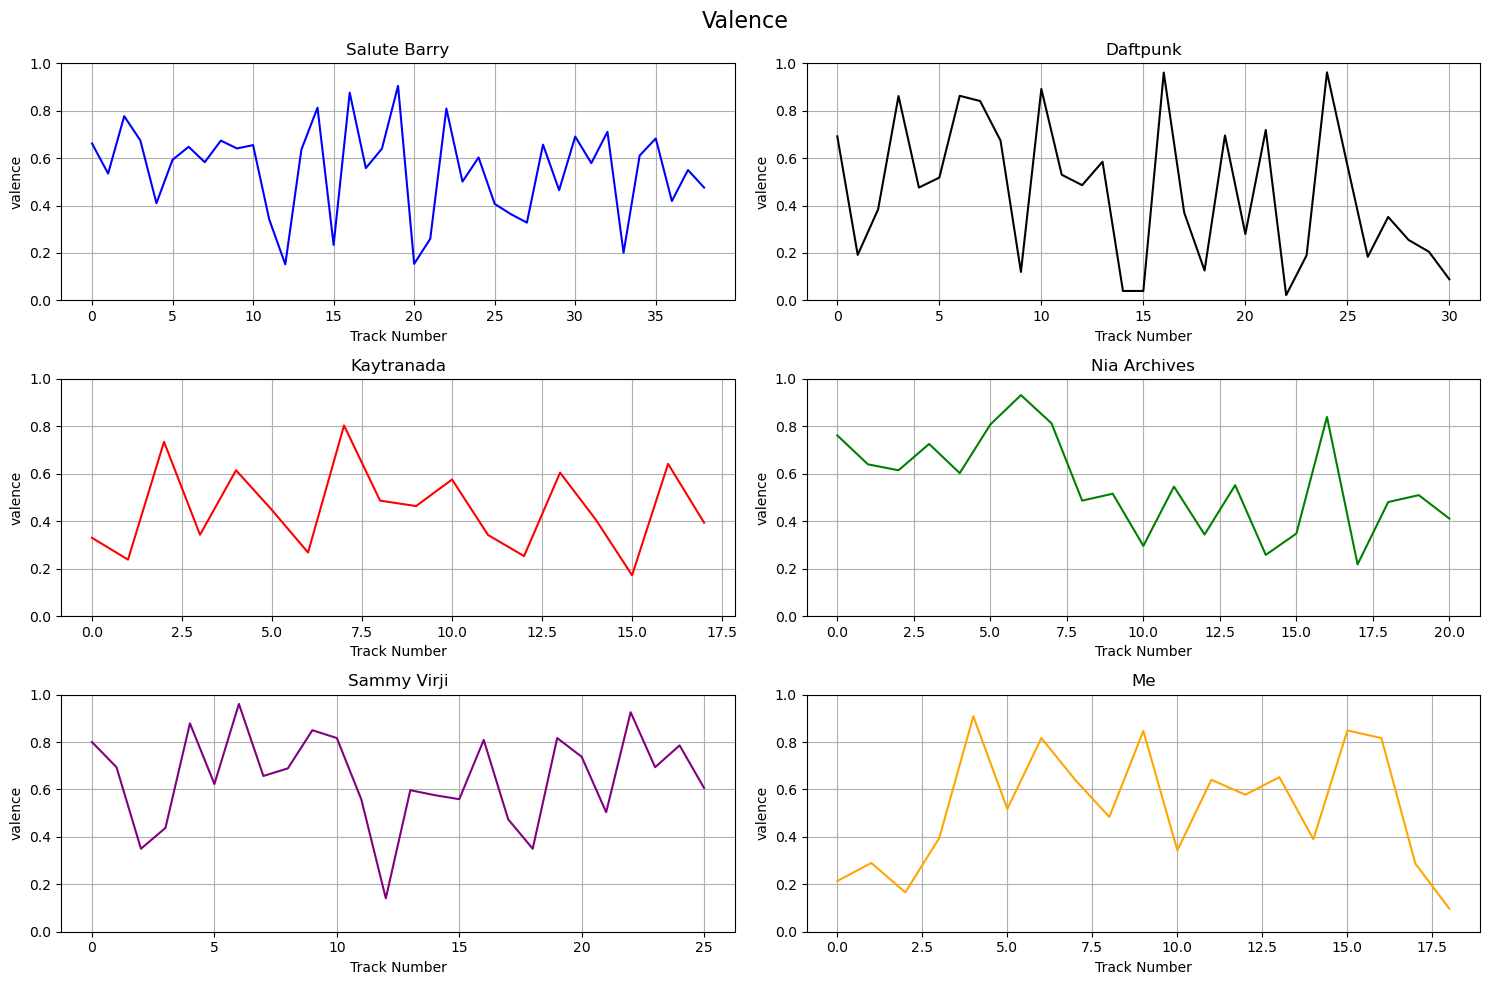

In [12]:
colors = ['blue', 'black', 'red', 'green', 'purple','orange']


num_columns = 2


num_rows = (len(artists_data) + num_columns - 1) // num_columns


fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))


axes = axes.flatten()


fig.suptitle('Valence', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['valence'],color = colors[i])
    ax.set_title(artist, fontsize=12)  
    ax.set_xlabel('Track Number')
    ax.set_ylabel('valence')
    ax.grid(True)
    ax.set_ylim(0, 1)


plt.tight_layout()

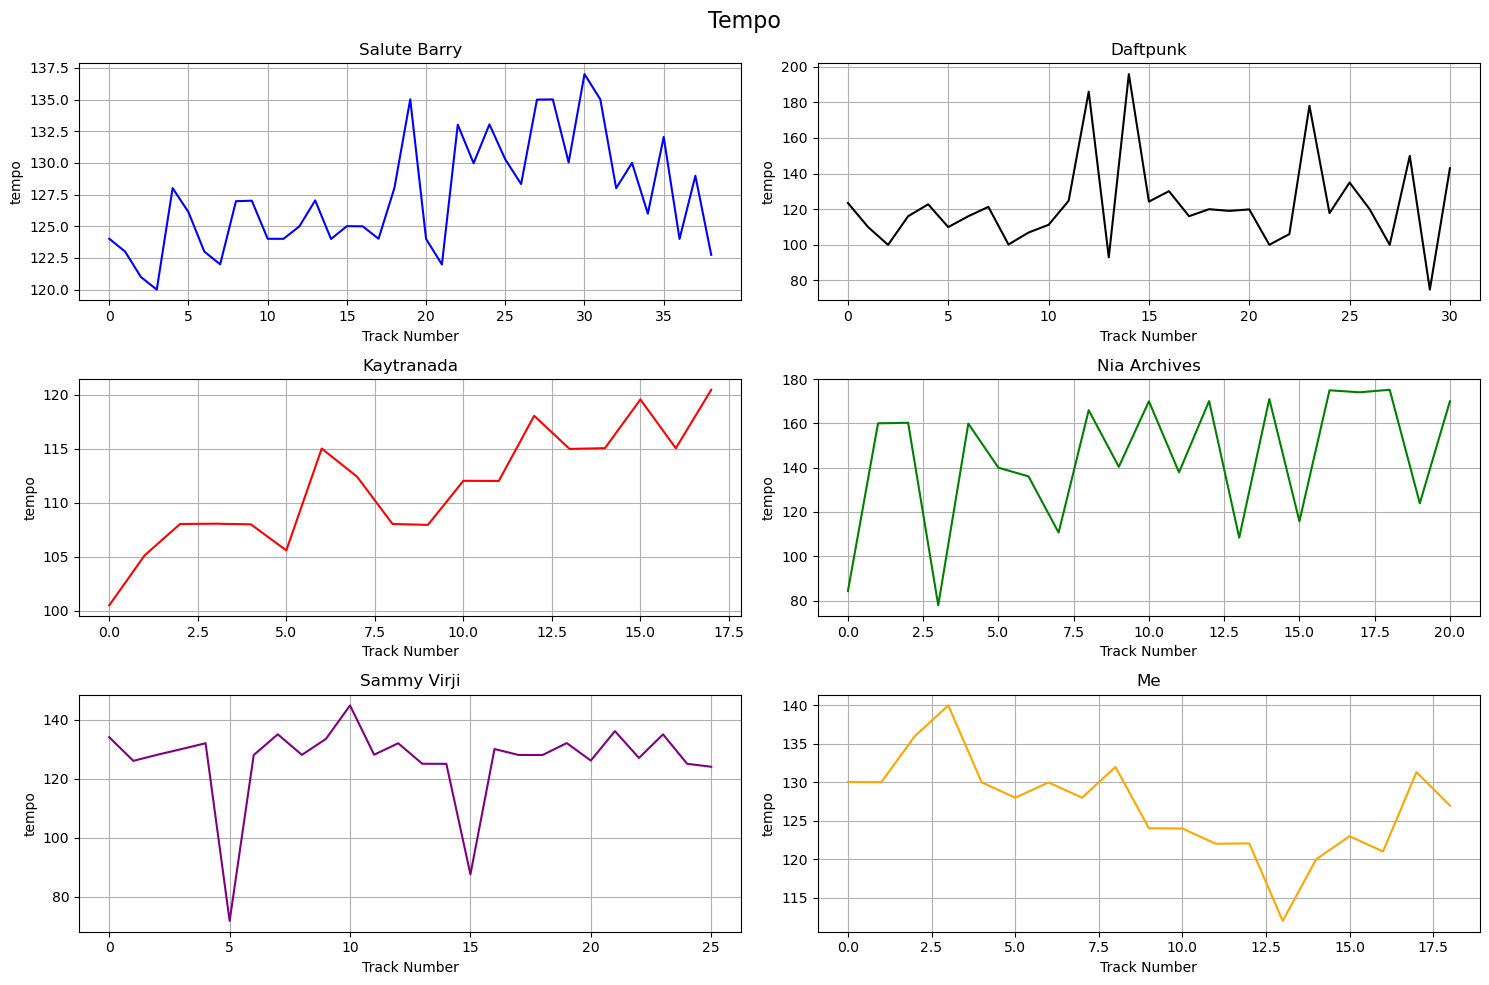

In [19]:
colors = ['blue', 'black', 'red', 'green', 'purple','orange']


num_columns = 2


num_rows = (len(artists_data) + num_columns - 1) // num_columns


fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))


axes = axes.flatten()


fig.suptitle('Tempo', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['tempo'],color = colors[i])
    ax.set_title(artist, fontsize=12)  
    ax.set_xlabel('Track Number')
    ax.set_ylabel('tempo')
    ax.grid(True)

plt.tight_layout()

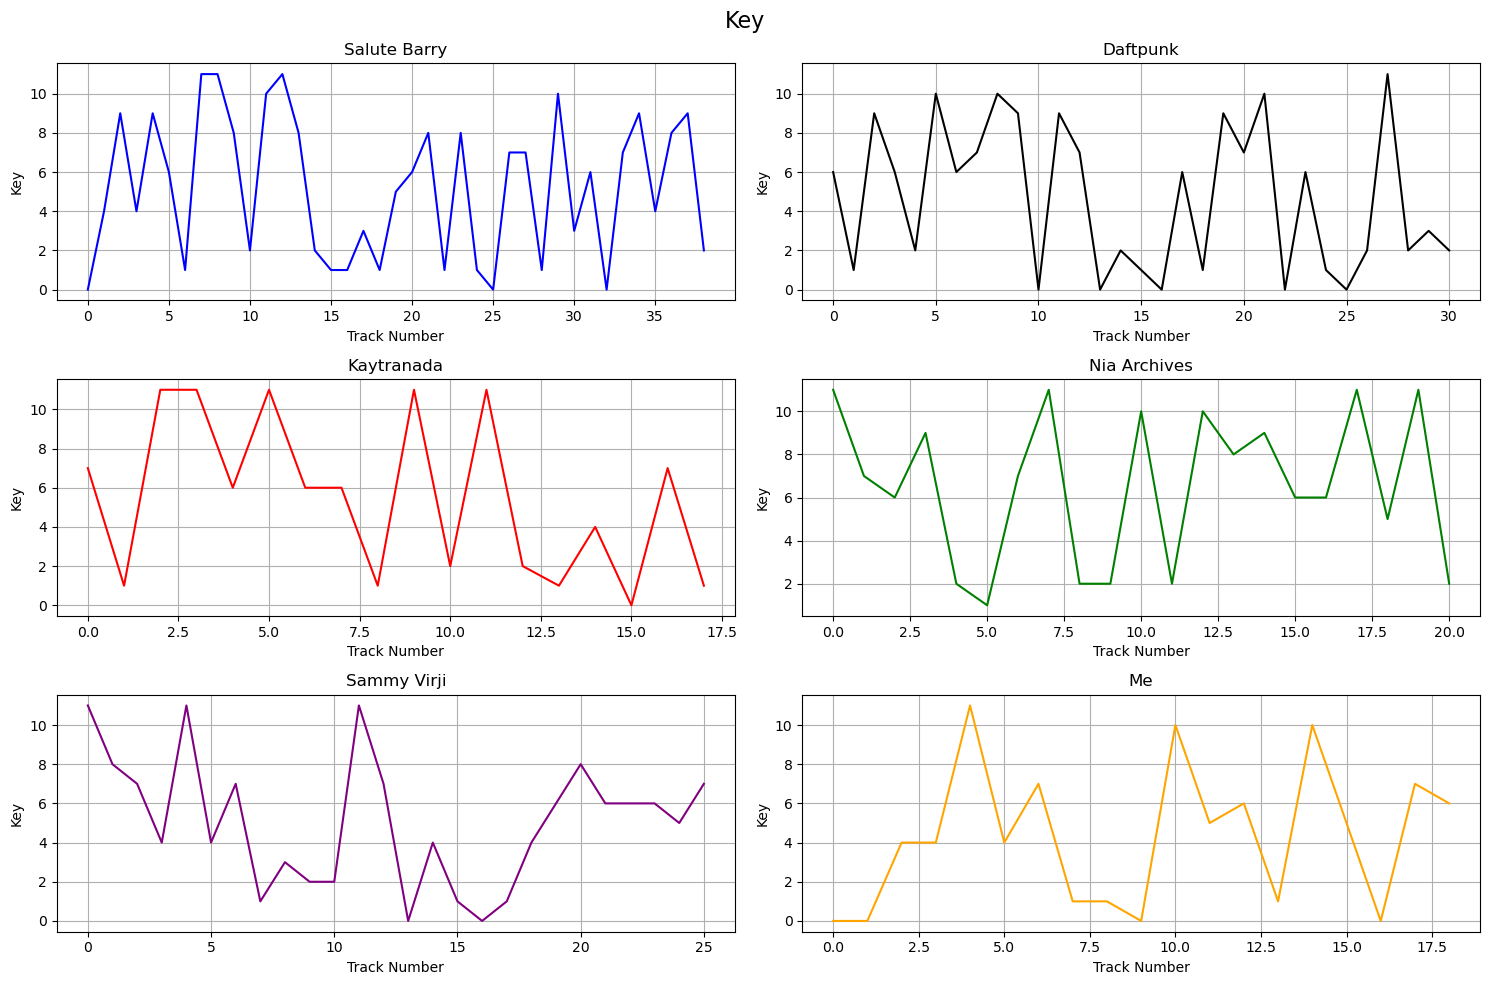

In [40]:
num_columns = 2

num_rows = (len(artists_data) + num_columns - 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 10))

axes = axes.flatten()

fig.suptitle('Key', fontsize=16)

for i, (artist, df) in enumerate(artists_data):
    ax = axes[i]
    ax.plot(df.index, df['key'],color = colors[i])
    ax.set_title(artist, fontsize=12)  
    ax.set_xlabel('Track Number')
    ax.set_ylabel('Key')
    ax.grid(True)

plt.tight_layout()

## Visualizing the difference of change in Tempo and Key from track to track

As a DJ, beatmatching (aligning tempos) and staying in key are fundamental for seamless mixes. Beatmatching ensures smooth transitions, while staying in key maintains harmony. These skills create cohesive sets that keep the audience engaged and dancing all night.

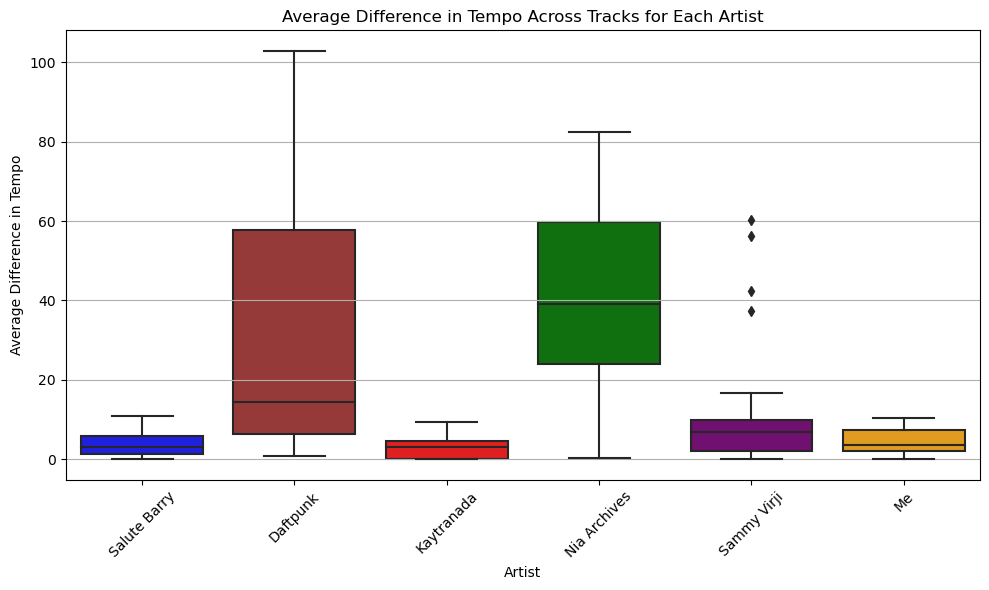

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create an empty list to store tempo difference DataFrames for each artist
tempo_diff_dfs = []

# Iterate through each artist's data
for artist, df in artists_data:
    # Calculate the difference in tempo between consecutive tracks
    tempo_diff = df['tempo'].diff().abs()
    # Create a DataFrame for the tempo difference data
    tempo_diff_df = pd.DataFrame({'Artist': artist, 'Tempo Difference': tempo_diff})
    # Append the tempo difference DataFrame to the list
    tempo_diff_dfs.append(tempo_diff_df)

# Concatenate tempo difference DataFrames into a single DataFrame
tempo_diff_df = pd.concat(tempo_diff_dfs, ignore_index=True)
colors = ['blue', 'brown', 'red', 'green', 'purple','orange']
# Create a boxplot for each artist's tempo difference data
plt.figure(figsize=(10, 6))
sns.boxplot(data=tempo_diff_df, x='Artist', y='Tempo Difference', palette=colors)
plt.title('Average Difference in Tempo Across Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Average Difference in Tempo')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()


In [15]:
# Getting a table of Average differences 
tempo_diff_df_avg = pd.concat(tempo_diff_dfs, ignore_index=True).groupby(['Artist']).mean()
tempo_diff_df_avg

,Tempo Difference
Artist,
Daftpunk,29.133967
Kaytranada,3.192471
Me,4.314667
Nia Archives,40.116400
Salute Barry,3.656816
Sammy Virji,12.751320


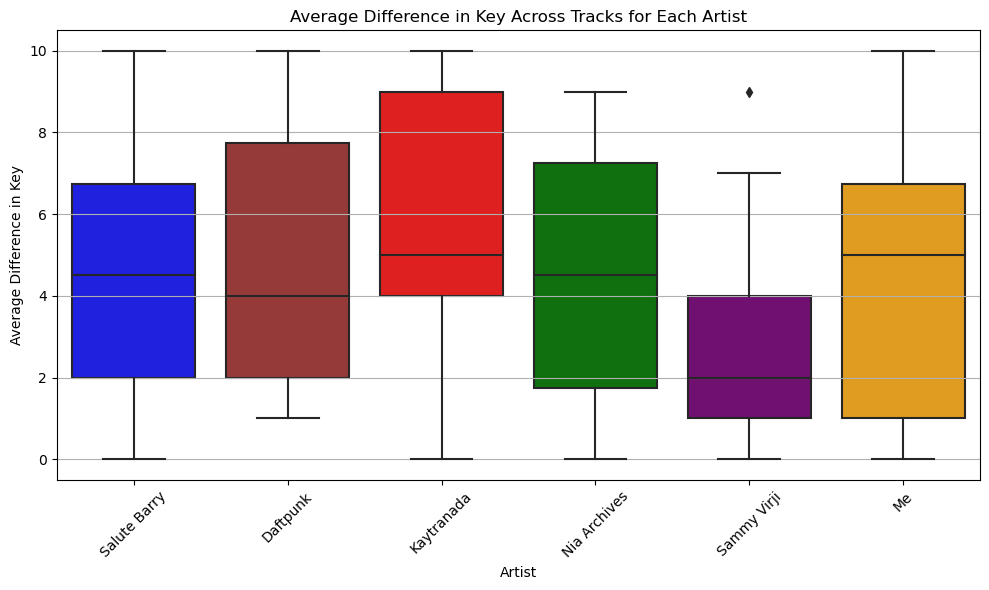

In [43]:
key_diff_dfs = []

for artist, df in artists_data:
    key_diff = df['key'].diff().abs()
    key_diff_df = pd.DataFrame({'Artist': artist, 'Key Difference': key_diff})
    key_diff_dfs.append(key_diff_df)

tempo_diff_df = pd.concat(key_diff_dfs, ignore_index=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=tempo_diff_df, x='Artist', y='Key Difference', palette=colors)
plt.title('Average Difference in Key Across Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Average Difference in Key')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

In [28]:
# Getting a table of Average differences 
key_diff_df_avg = pd.concat(key_diff_dfs, ignore_index=True).groupby(['Artist']).mean()
key_diff_df_avg

,Key Difference
Artist,
Daftpunk,4.533333
Kaytranada,5.529412
Me,4.222222
Nia Archives,4.550000
Salute Barry,4.263158
Sammy Virji,2.960000
